<a href="https://colab.research.google.com/github/Toroi0610/ALife/blob/master/gray_scott.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt -qq install xvfb ffmpeg> /dev/null
!pip -q install JSAnimation
!pip -q install pyglet==1.2.4
!pip -q install pyopengl
!pip -q install pyvirtualdisplay
!apt -qq install python-opengl



python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [0]:
import numpy as np
import matplotlib
import JSAnimation
import pyglet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import HTML

# Gray-Scott equation
反応拡散方程式のひとつであるGray-Scott方程式を数値計算してみます．
\begin{eqnarray}
    U+2V &\rightarrow&3V\\
    V &\rightarrow&P
\end{eqnarray}

* Gray-Scott Equation
\begin{eqnarray}
    \frac{\partial u}{\partial t} &=& Du\Delta u-uv^2+f(1.0-u) \tag{1}\\
    \frac{\partial v}{\partial t} &=& Dv\Delta v + uv^2-v(f+k)\tag{2}
\end{eqnarray}

* 離散化Gray-Scott Equation
\begin{eqnarray}
    \Delta u &=& \frac{\partial^2u}{\partial x^2}+\frac{\partial^2u}{\partial y^2}\\
    &=& \frac{u(x+dx,y,t)-2u(x,y,t)+u(x-dx,y,t)}{(dx)^2} + \frac{u(x,y+dy,t)-2u(x,y,t)+u(x,y-dy,t)}{(dy)^2}\tag{3}\\
    \Delta v &=& \frac{\partial^2v}{\partial x^2}+\frac{\partial^2v}{\partial y^2}\\
    &=& \frac{v(x+dx,y,t)-2v(x,y,t)+v(x-dx,y,t)}{(dx)^2} + \frac{v(x,y+dy,t)-2v(x,y,t)+v(x,y-dy,t)}{(dy)^2}\tag{4}\\
    dx=dyとすると\\
    \Delta u &=& \frac{u(x+dx,y,t)+u(x-dx,y,t)+u(x,y+dy,t)+u(x,y-dy,t)-4u(x,y,t)}{(dx)^2}\tag{3'}\\
    \Delta v &=& \frac{v(x+dx,y,t)+v(x-dx,y,t)+v(x,y+dy,t)+v(x,y-dy,t)-4v(x,y,t)}{(dx)^2}\tag{4'}\\
    u(x, y, t+dt) &=& u(x,y,t) +  \frac{\partial u(x,y,t)}{\partial t}dt\tag{5}\\
    v(x, y, t+dt) &=& v(x,y,t) +  \frac{\partial v(x,y,t)}{\partial t}dt\tag{6}
\end{eqnarray}


In [0]:
def gray_scott_equation(u, v, Du=2e-5, Dv=1e-5, f=0.04, k=0.06, dx=0.01):
    laplacian_u = (np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) + np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1) - 4*u) / (dx*dx)
    laplacian_v = (np.roll(v, 1, axis=0) + np.roll(v, -1, axis=0) + np.roll(v, 1, axis=1) + np.roll(v, -1, axis=1) - 4*v) / (dx*dx)
    uvv = u * v * v
    dudt = Du * laplacian_u - uvv + f * (1.0 - u)
    dvdt = Dv * laplacian_v + uvv - v * (f + k)
    
    return dudt, dvdt

In [0]:
# シミュレーションのパラメタ
SPACE_GRID_SIZE = 256  #@param {type:"integer"}
dx = 0.01  #@param {type:"slider", min:0.001, max:0.1, step:0.001}
dt = 1 #@param {type:"slider", min:0.01, max:1, step:0.01}
VISUALIZATION_STEP = 8 #@param {type:"integer"}
u_min, u_max = 0, 1
v_min, v_max = 0, 1


# モデルの各パラメタ
Du = 2e-5 #@param {type:"number"}
Dv = 1e-5 #@param {type:"number"}
f = 0.04 #@param {type:"slider", min:0.0, max:0.1, step:0.001}
k = 0.06 #@param {type:"slider", min:0.0, max:0.1, step:0.001}

# 初期化
u = np.ones((SPACE_GRID_SIZE, SPACE_GRID_SIZE))
v = np.zeros((SPACE_GRID_SIZE, SPACE_GRID_SIZE))

# 中央にSQUARE_SIZE四方の正方形を置く
SQUARE_SIZE = 20
u[SPACE_GRID_SIZE//2-SQUARE_SIZE//2:SPACE_GRID_SIZE//2+SQUARE_SIZE//2,
  SPACE_GRID_SIZE//2-SQUARE_SIZE//2:SPACE_GRID_SIZE//2+SQUARE_SIZE//2] = 0.5
v[SPACE_GRID_SIZE//2-SQUARE_SIZE//2:SPACE_GRID_SIZE//2+SQUARE_SIZE//2,
  SPACE_GRID_SIZE//2-SQUARE_SIZE//2:SPACE_GRID_SIZE//2+SQUARE_SIZE//2] = 0.25

# 対称性を壊すために、少しノイズを入れる
u += np.random.rand(SPACE_GRID_SIZE, SPACE_GRID_SIZE)*0.1
v += np.random.rand(SPACE_GRID_SIZE, SPACE_GRID_SIZE)*0.1   

In [0]:
frames = []

for i in range(10000):
    if i % VISUALIZATION_STEP == 0:
        frames.append(np.copy(u))
    dudt, dvdt = gray_scott_equation(u, v, Du, Dv, f, k, dx)
    u += dudt * dt
    v += dvdt * dt

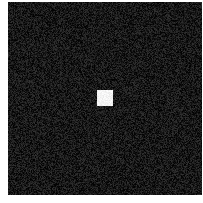

In [0]:
size = 18.0
plt.figure(figsize=(frames[0].shape[1]/size, frames[0].shape[0]/size), dpi=int(size))
patch = plt.imshow(frames[0])
plt.axis('off')
  
def animate(i):
    patch.set_data(frames[i])
    
anim = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
HTML(anim.to_html5_video())